## Text Data Science:  Midterm (practice)

Please complete all of the questions. Save your notebook as html->pdf, as well as ipynb, and submit to the course Canvas site. You may use any materials to solve the problems, including past Labs and the Internet. Have fun!





In [1]:
from datascience import *
import numpy as np
import re
from collections import Counter


# direct plots to appear within the cell, and set their style
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# turn off some pesky warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


## 1. Analyzing a Gutenberg book

In [2]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

The online book for "Peter Pan," by J. M. Barrie, is [here](https://www.gutenberg.org/ebooks/16).
From this web site you can see various metadata for the book as well as the [link the text itself](https://www.gutenberg.org/files/16/16-0.txt), which is [https://www.gutenberg.org/files/16/16-0.txt](https://www.gutenberg.org/files/16/16-0.txt)


In [3]:
peter_pan_url = 'http://www.gutenberg.org/files/16/16-0.txt'
peter_pan_text = read_url(peter_pan_url)
peter_pan_chapters = peter_pan_text.split('Chapter ')[18:]



For each of the following questions, give a Python expression that evaluates to the correct answer -- do not "hard code" the answer with a number or constant expression like `42` or `"Peter Pan"`

### 1.1  What is the length of the text, in characters?

In [4]:
pp_len_chars = len(peter_pan_text)
pp_len_chars

275933

### 1.2 How many chapters are there in the book?

In [9]:
# general approach: find the highest chapter
nums = re.findall("Chapter (\d+)", peter_pan_text)
print(nums)
nums = [int(num) for num in nums]
print(nums)
pp_num_chapters = max(nums)
print(pp_num_chapters)
# less general: how many chapters did we have
pp_num_chapters = len(peter_pan_chapters)
print(pp_num_chapters)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
17
17


### 1.3 Number of words function

Write a function `num_words(str)` that takes an input string and returns the number of space-delimited tokens in the string. Hint: Try using the `split()` function.


In [17]:
# less general
def num_words(str):
    return len(str.split(" "))

print(num_words("test this"))
print(num_words("test   this"))

# more general
def num_words_general(str):
    return len(re.split("\s+", str))

print(num_words_general("test this"))
print(num_words_general("test   this"))

# nice thing about general is that it handles tabs (\t) gracefully
print(num_words("test\tthis")) # tabs
print(num_words_general("test\tthis")) # tabs

2
4
1
2
2
2


### 1.4 Lengths of the chapters

Using your `num_words` function, create a table `pp_counts` that has a row for each chapter in "Peter Pan", and three columns: A  `chapter` column with the chapter number, a `characters` column with the number of characters in the chapter (as a long string), and the `words` column containing the number of space-delimited tokens.

In [25]:
chapter = []
characters = []
words = []
for i in range(pp_num_chapters):
    characters.append(len(peter_pan_chapters[i]))
    words.append(num_words(peter_pan_chapters[i]))
pp_counts = Table().with_columns("Chapter", np.arange(1, pp_num_chapters+1), "Characters", characters, "Words", words)
pp_counts.show()

Chapter,Characters,Words
1,16403,3055
2,15807,2954
3,22325,4145
4,15383,2879
5,19537,3599
6,13567,2490
7,12870,2414
8,20784,3921
9,5829,1069
10,10749,1966


### 1.5 Longest chapter

What is the chapter with the most words? (Take the appropriate row from the table.)


In [27]:
row = np.argmax(pp_counts["Words"])
pp_longest_chapter = pp_counts["Chapter"][row]
print(pp_longest_chapter)

17


### 1.6 Plotting the chapter lengths

Give a bar plot showing the number of words in each chapter


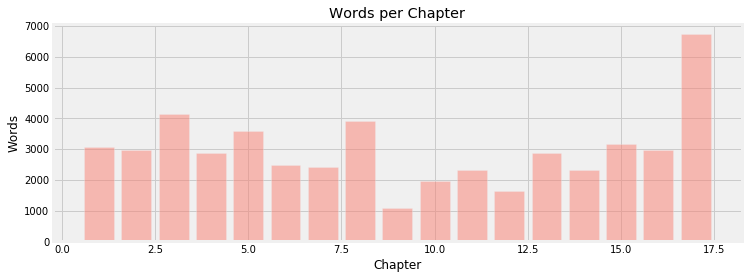

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(pp_counts.column('Chapter'), pp_counts.column('Words'), align='center', alpha=0.5, color='salmon')
plt.xlabel('Chapter')
plt.ylabel('Words')
plt.title('Words per Chapter')
plt.show()

## 2. Analyzing a TED Talk

Now you will carry out some text processing on one of the TED talks


In [36]:
filename = "ted_talks_50.csv"
data = Table.read_table(filename)
data

transcript,url
"Good morning. How are you?(Laughter)It's been great, has ...",https://www.ted.com/talks/ken_robinson_says_schools_kill ...
"Thank you so much, Chris. And it's truly a great honor t ...",https://www.ted.com/talks/al_gore_on_averting_climate_crisis
"(Music: ""The Sound of Silence,"" Simon & Garfunkel)Hello ...",https://www.ted.com/talks/david_pogue_says_simplicity_sells
If you're here today — and I'm very happy that you are — ...,https://www.ted.com/talks/majora_carter_s_tale_of_urban_ ...
"About 10 years ago, I took on the task to teach global d ...",https://www.ted.com/talks/hans_rosling_shows_the_best_st ...
Thank you. I have to tell you I'm both challenged and ex ...,https://www.ted.com/talks/tony_robbins_asks_why_we_do_wh ...
"On September 10, the morning of my seventh birthday, I c ...",https://www.ted.com/talks/julia_sweeney_on_letting_go_of_god
I'm going to present three projects in rapid fire. I don ...,https://www.ted.com/talks/joshua_prince_ramus_on_seattle ...
It's wonderful to be back. I love this wonderful gatheri ...,https://www.ted.com/talks/dan_dennett_s_response_to_rick ...
"I'm often asked, ""What surprised you about the book?"" An ...",https://www.ted.com/talks/rick_warren_on_a_life_of_purpose


We'll work with talk number 42: Peter Donnelly on "How Statistics Fools Juries"

In [37]:
tt_text = data.column('transcript')[42]
tt_url = data.column('url')[42]
print(tt_url)
print(tt_text)

https://www.ted.com/talks/peter_donnelly_shows_how_stats_fool_juries
As other speakers have said, it's a rather daunting experience — a particularly daunting experience — to be speaking in front of this audience. But unlike the other speakers, I'm not going to tell you about the mysteries of the universe, or the wonders of evolution, or the really clever, innovative ways people are attacking the major inequalities in our world. Or even the challenges of nation-states in the modern global economy. My brief, as you've just heard, is to tell you about statistics — and, to be more precise, to tell you some exciting things about statistics. And that's — (Laughter) — that's rather more challenging than all the speakers before me and all the ones coming after me. (Laughter) One of my senior colleagues told me, when I was a youngster in this profession, rather proudly, that statisticians were people who liked figures but didn't have the personality skills to become accountants. (Laughter) And 

### 2.1 Lower case

Convert the text to lower case

In [38]:
tt_text = tt_text.lower()
print(tt_text)

as other speakers have said, it's a rather daunting experience — a particularly daunting experience — to be speaking in front of this audience. but unlike the other speakers, i'm not going to tell you about the mysteries of the universe, or the wonders of evolution, or the really clever, innovative ways people are attacking the major inequalities in our world. or even the challenges of nation-states in the modern global economy. my brief, as you've just heard, is to tell you about statistics — and, to be more precise, to tell you some exciting things about statistics. and that's — (laughter) — that's rather more challenging than all the speakers before me and all the ones coming after me. (laughter) one of my senior colleagues told me, when i was a youngster in this profession, rather proudly, that statisticians were people who liked figures but didn't have the personality skills to become accountants. (laughter) and there's another in-joke among statisticians, and that's, "how do you 

### 2.2 Remove non-letters

Remove all characters that are not space or the letters a-z


In [41]:
# important to play with something temporary first (when making this function), because otherwise you'll ruin tt_text
tt_text = re.sub("[^\sa-z]","", tt_text)
print(tt_text)

as other speakers have said its a rather daunting experience  a particularly daunting experience  to be speaking in front of this audience but unlike the other speakers im not going to tell you about the mysteries of the universe or the wonders of evolution or the really clever innovative ways people are attacking the major inequalities in our world or even the challenges of nationstates in the modern global economy my brief as youve just heard is to tell you about statistics  and to be more precise to tell you some exciting things about statistics and thats  laughter  thats rather more challenging than all the speakers before me and all the ones coming after me laughter one of my senior colleagues told me when i was a youngster in this profession rather proudly that statisticians were people who liked figures but didnt have the personality skills to become accountants laughter and theres another injoke among statisticians and thats how do you tell the introverted statistician from the

### 2.3 Remove extra space

Remove all extra spaces, by replacing two or more spaces by a single space



In [42]:
tt_text = re.sub("\s+", " ", tt_text)
print(tt_text)

as other speakers have said its a rather daunting experience a particularly daunting experience to be speaking in front of this audience but unlike the other speakers im not going to tell you about the mysteries of the universe or the wonders of evolution or the really clever innovative ways people are attacking the major inequalities in our world or even the challenges of nationstates in the modern global economy my brief as youve just heard is to tell you about statistics and to be more precise to tell you some exciting things about statistics and thats laughter thats rather more challenging than all the speakers before me and all the ones coming after me laughter one of my senior colleagues told me when i was a youngster in this profession rather proudly that statisticians were people who liked figures but didnt have the personality skills to become accountants laughter and theres another injoke among statisticians and thats how do you tell the introverted statistician from the extr

### 2.4 Count statistics

Count the number of times the word "statistics" appears in the Ted Talk

In [44]:
tt_statistics_count = len(re.findall("statistics", tt_text))
print(tt_statistics_count)

7


### 2.5 Creating a vocabulary

Recall that we can use the `Counter` class to build the vocabulary.  Counter is a Python dictionary where keys are the objects to be counted and the values are their counts. Using the `Counter` class, create a vocabulary of all unique words that appear in the talk, using the processed form `tt_text`. How many words are there?

In [48]:
tt_list = tt_text.split(" ")
c = Counter(tt_list) # if you do this on tt_text, it fails - see if you can tell why
# print(c)
num_tokens = len(c)
print(num_tokens)

882


### 2.6 Most common words

What are the 10 most frequently used words in the talk?


In [49]:
most_common = c.most_common(10)
print(most_common)

[('the', 226), ('and', 146), ('of', 125), ('a', 105), ('to', 102), ('in', 80), ('that', 69), ('you', 68), ('is', 57), ('it', 45)]
